In [54]:
import pandas as pd
import geopandas as gpd
import numpy as np
import maup
from maup import smart_repair
import time
import os
import matplotlib.pyplot as plt
import networkx as nx
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import time
from gerrychain.tree import bipartition_tree

In [35]:
markov_chain_50000 = pd.read_csv('./markov_chain_ensemble_results50000.csv')
markov_chain_40000 = pd.read_csv('./markov_chain_ensemble_results40000.csv')

In [36]:
print(markov_chain_50000["Cut Edges"].head())
print(markov_chain_50000["Presidential Democratic Districts"].head())
print(markov_chain_50000["Presidential Republican Districts"].head())
print(markov_chain_50000["Presidential Efficiency Gap"].head())
print(markov_chain_50000["Governor Democratic Districts"].head())
print(markov_chain_50000["Governor Republican Districts"].head())
print(markov_chain_50000["Governor Efficiency Gap"].head())

0    672.0
1    704.0
2    684.0
3    690.0
4    709.0
Name: Cut Edges, dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Presidential Democratic Districts, dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Presidential Republican Districts, dtype: float64
0   -0.267221
1   -0.261475
2   -0.261475
3   -0.261475
4   -0.261475
Name: Presidential Efficiency Gap, dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: Governor Democratic Districts, dtype: float64
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Governor Republican Districts, dtype: float64
0   -0.140447
1   -0.134702
2   -0.134702
3   -0.134702
4   -0.128801
Name: Governor Efficiency Gap, dtype: float64


In [37]:
print(markov_chain_40000["Cut Edges"].head())
print(markov_chain_40000["Presidential Democratic Districts"].head())
print(markov_chain_40000["Presidential Republican Districts"].head())
print(markov_chain_40000["Presidential Efficiency Gap"].head())
print(markov_chain_40000["Governor Democratic Districts"].head())
print(markov_chain_40000["Governor Republican Districts"].head())
print(markov_chain_40000["Governor Efficiency Gap"].head())

0    672.0
1    577.0
2    679.0
3    681.0
4    693.0
Name: Cut Edges, dtype: float64
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Presidential Democratic Districts, dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Presidential Republican Districts, dtype: float64
0   -0.267221
1   -0.267221
2   -0.267221
3   -0.268357
4   -0.265776
Name: Presidential Efficiency Gap, dtype: float64
0    3.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Governor Democratic Districts, dtype: float64
0    5.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Governor Republican Districts, dtype: float64
0   -0.140447
1   -0.259437
2   -0.259437
3   -0.260625
4   -0.258017
Name: Governor Efficiency Gap, dtype: float64


In [51]:
print(markov_chain_50000.iloc[0]["Presidential Democratic Districts"])
print(markov_chain_50000.iloc[0]["Presidential Republican Districts"])
print(markov_chain_50000.iloc[0]["Presidential Efficiency Gap"])
print(markov_chain_40000.iloc[0]["Governor Democratic Districts"])
print(markov_chain_40000.iloc[0]["Governor Republican Districts"])
print(markov_chain_40000.iloc[0]["Governor Efficiency Gap"])


2.0
6.0
-0.267221425155428
3.0
5.0
-0.1404474158602523


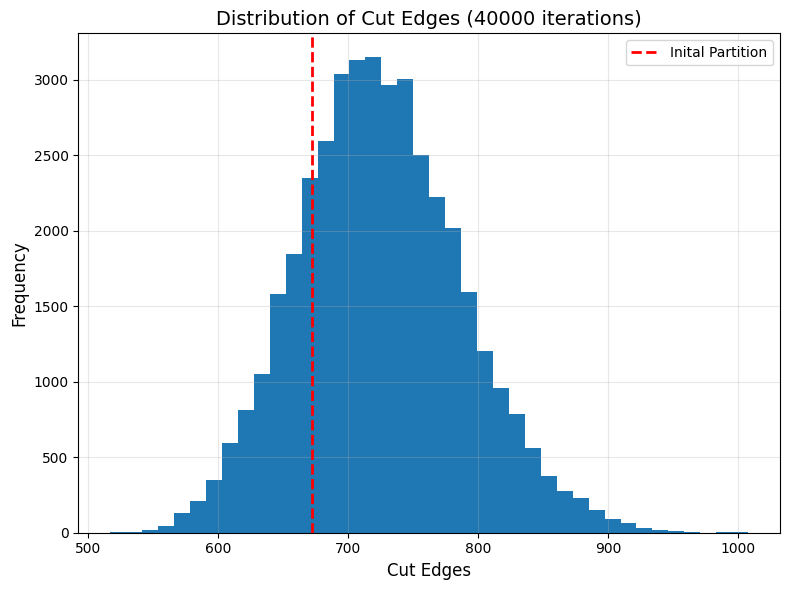

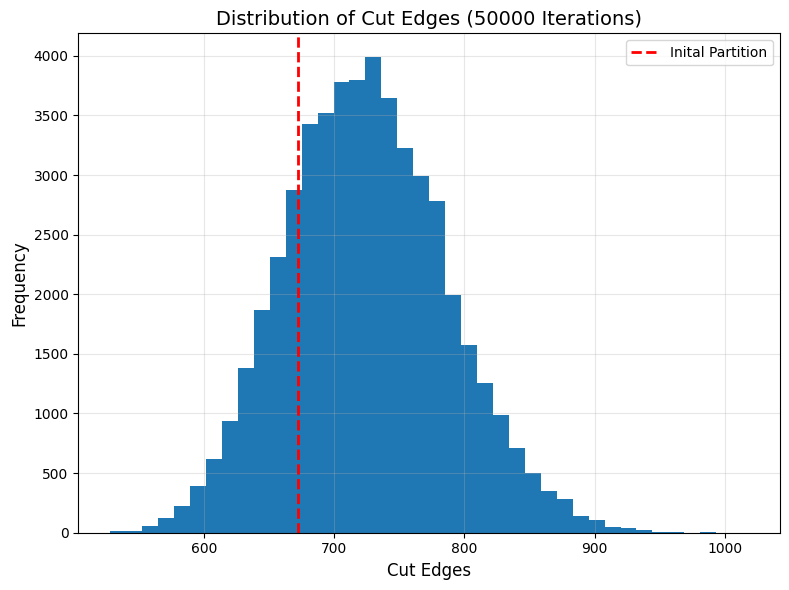

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(markov_chain_40000["Cut Edges"], bins=40, align='mid')
plt.title("Distribution of Cut Edges (40000 iterations)", fontsize=14)
plt.axvline(x=markov_chain_40000.iloc[0]["Cut Edges"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Cut Edges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(markov_chain_50000["Cut Edges"], bins=40, align='mid')
plt.title("Distribution of Cut Edges (50000 Iterations)", fontsize=14)
plt.axvline(x=markov_chain_50000.iloc[0]["Cut Edges"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Cut Edges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

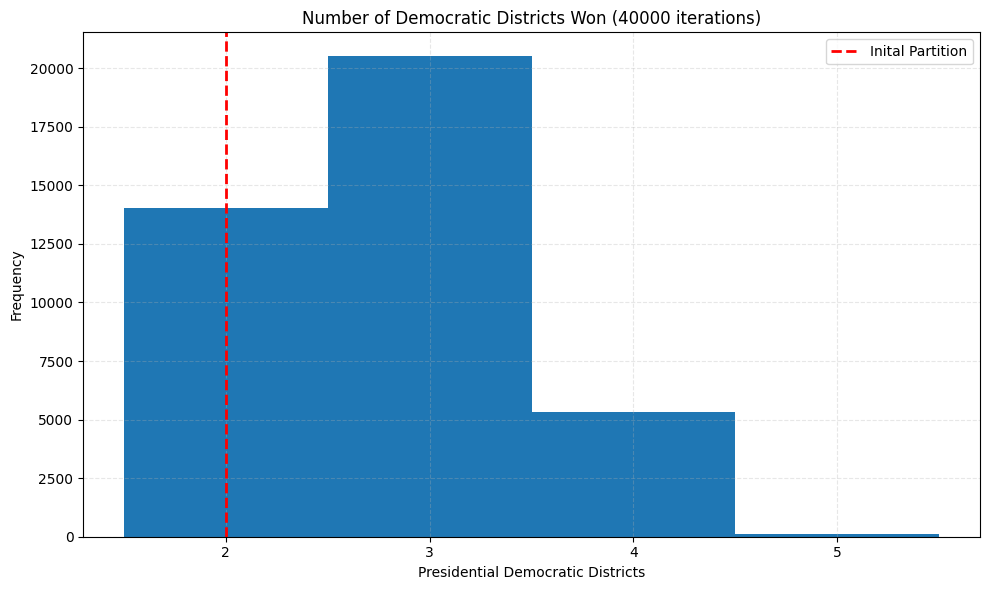

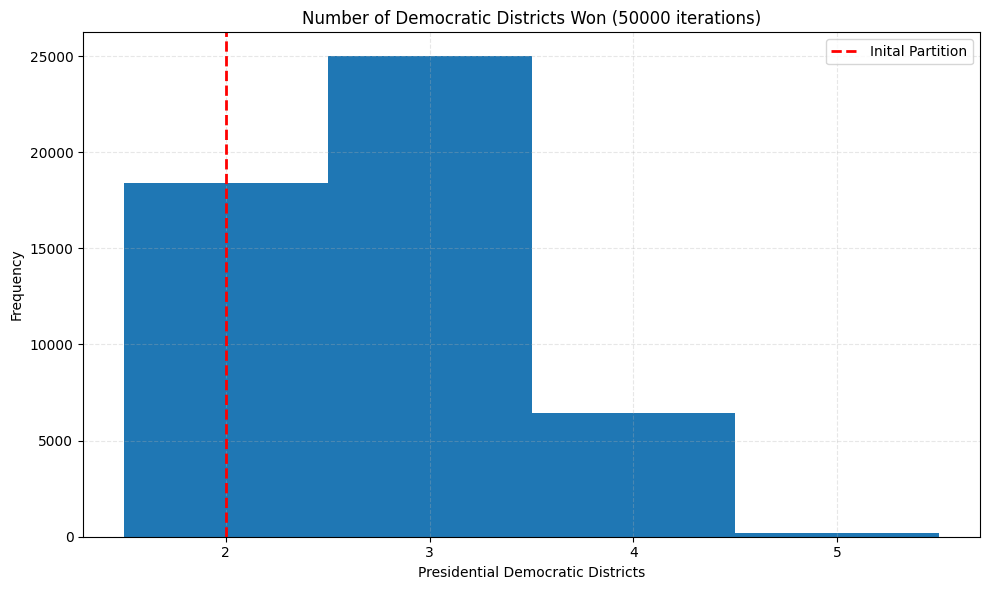

In [108]:
plt.figure(figsize=(10, 6))
bin_edges = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
plt.hist(markov_chain_40000["Presidential Democratic Districts"], bins=bin_edges)
plt.title("Number of Democratic Districts Won (40000 iterations)")
plt.axvline(x=markov_chain_40000.iloc[0]["Presidential Democratic Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Presidential Democratic Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bin_edges = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
plt.hist(markov_chain_50000["Presidential Democratic Districts"], bins=bin_edges)
plt.axvline(x=markov_chain_50000.iloc[0]["Presidential Democratic Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.title("Number of Democratic Districts Won (50000 iterations)")
plt.xlabel("Presidential Democratic Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

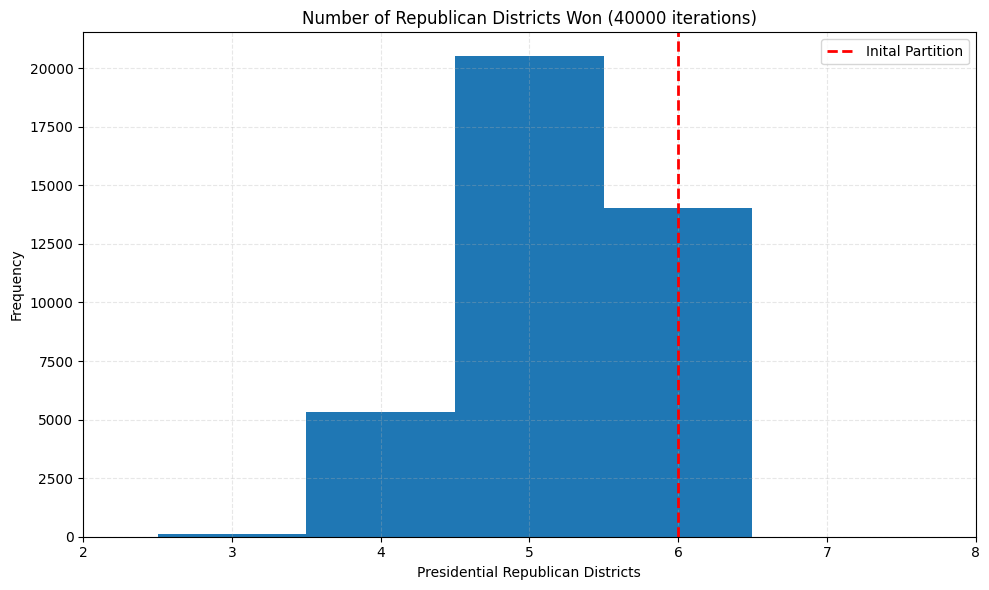

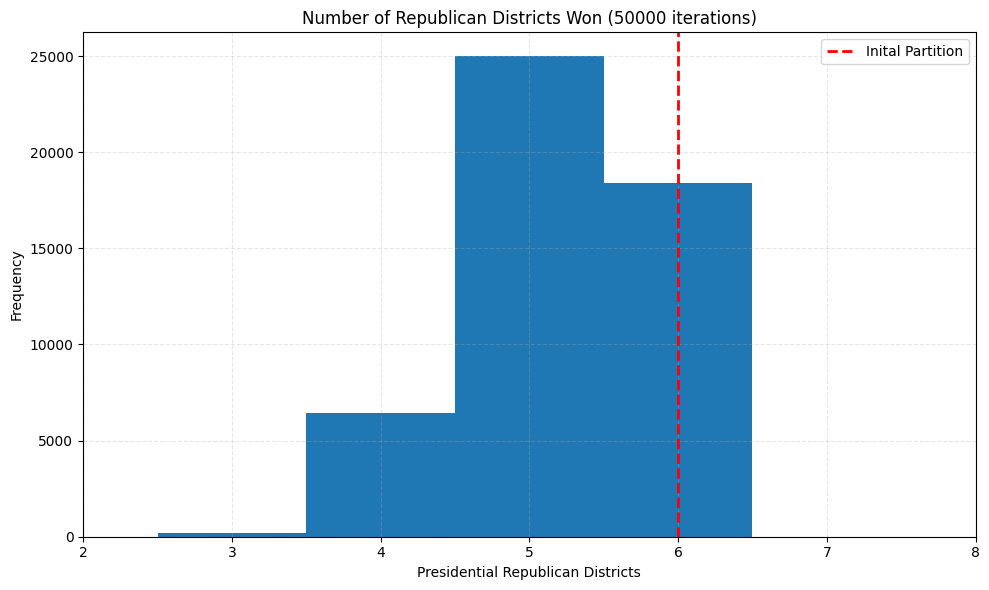

In [107]:
plt.figure(figsize=(10, 6))
bin_edges = np.array([2.5, 3.5, 4.5, 5.5, 6.5])
plt.hist(markov_chain_40000["Presidential Republican Districts"], bins=bin_edges, align='mid')
plt.title("Number of Republican Districts Won (40000 iterations)")
plt.axvline(x=markov_chain_40000.iloc[0]["Presidential Republican Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Presidential Republican Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bin_edges = np.array([2.5, 3.5, 4.5, 5.5, 6.5])
plt.hist(markov_chain_50000["Presidential Republican Districts"], bins=bin_edges, align='mid')
plt.title("Number of Republican Districts Won (50000 iterations)")
plt.axvline(x=markov_chain_50000.iloc[0]["Presidential Republican Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Presidential Republican Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

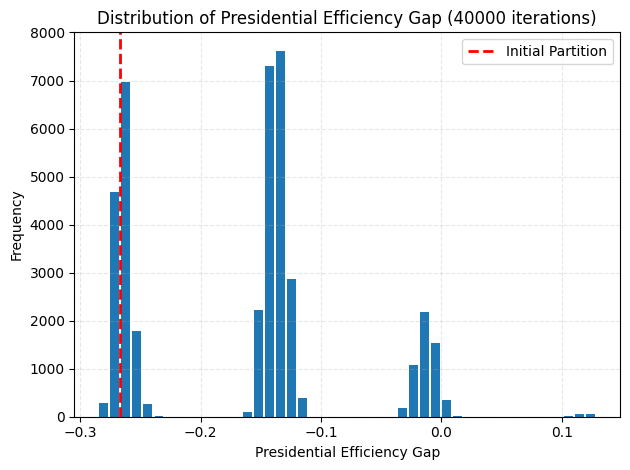

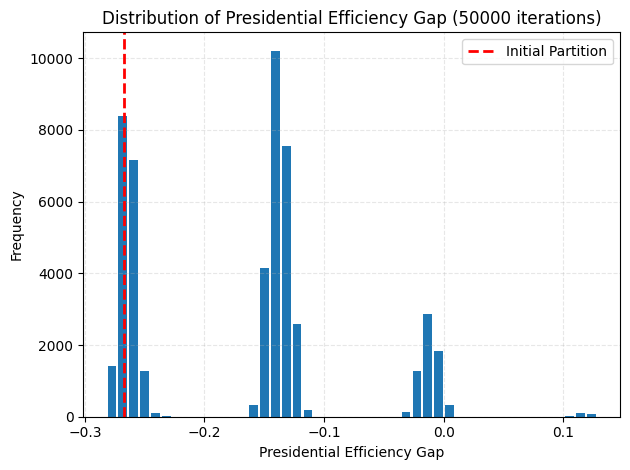

In [105]:
bin_edges = np.arange(-0.35, 0.15, 0.1)
plt.hist(markov_chain_40000["Presidential Efficiency Gap"],bins=45, rwidth=0.8)
plt.axvline(x=markov_chain_40000.iloc[0]["Presidential Efficiency Gap"], color='red', linestyle='--', linewidth=2, label='Initial Partition')
plt.title("Distribution of Presidential Efficiency Gap (40000 iterations)")
plt.xlabel("Presidential Efficiency Gap")
plt.ylabel("Frequency")
plt.xticks(np.arange(-0.3, 0.2, 0.1))  # Set x-ticks at the values you want displayed
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')  # Add legend in top right
plt.tight_layout()
plt.show()

bin_edges = np.arange(-0.35, 0.15, 0.1)
plt.hist(markov_chain_50000["Presidential Efficiency Gap"],bins=45, rwidth=0.8)
plt.axvline(x=markov_chain_50000.iloc[0]["Presidential Efficiency Gap"], color='red', linestyle='--', linewidth=2, label='Initial Partition')
plt.title("Distribution of Presidential Efficiency Gap (50000 iterations)")
plt.xlabel("Presidential Efficiency Gap")
plt.ylabel("Frequency")
plt.xticks(np.arange(-0.3, 0.2, 0.1))  # Set x-ticks at the values you want displayed
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')  # Add legend in top right
plt.tight_layout()
plt.show()

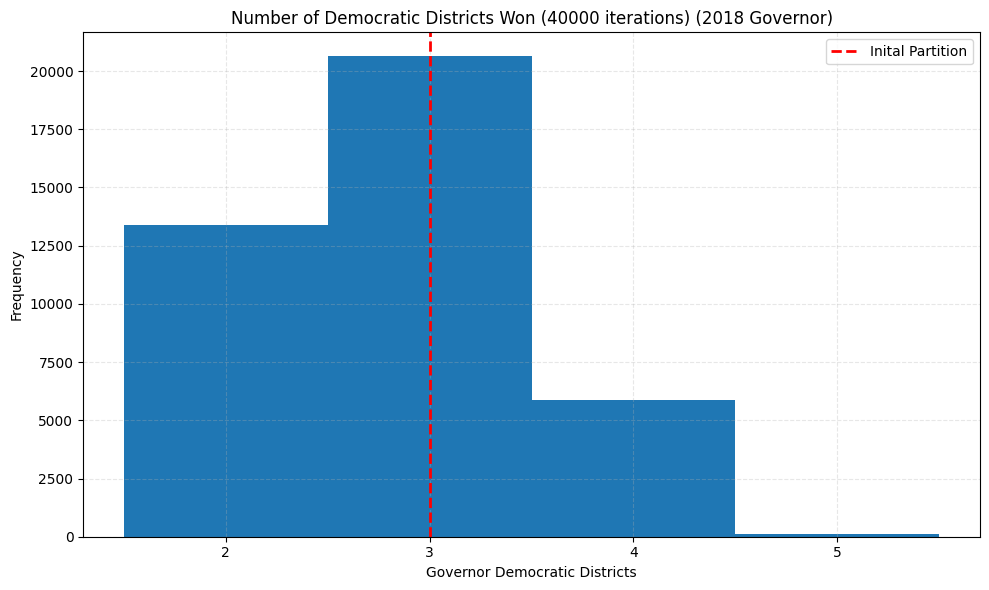

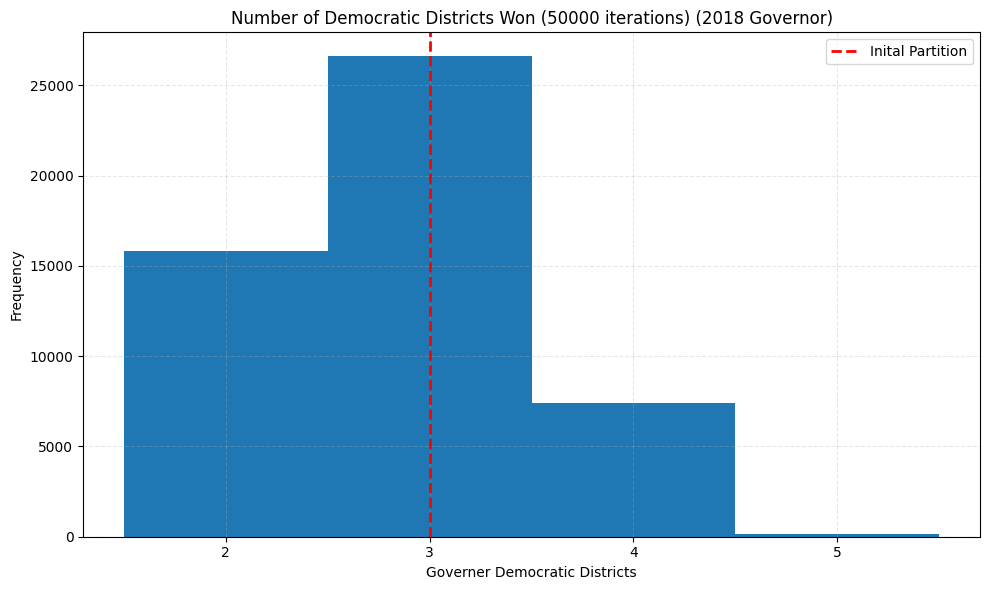

In [114]:
plt.figure(figsize=(10, 6))
bin_edges = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
plt.hist(markov_chain_40000["Governor Democratic Districts"], bins=bin_edges)
plt.title("Number of Democratic Districts Won (40000 iterations) (2018 Governor)")
plt.axvline(x=markov_chain_40000.iloc[0]["Governor Democratic Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Governor Democratic Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bin_edges = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
plt.hist(markov_chain_50000["Governor Democratic Districts"], bins=bin_edges)
plt.axvline(x=markov_chain_50000.iloc[0]["Governor Democratic Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.title("Number of Democratic Districts Won (50000 iterations) (2018 Governor)")
plt.xlabel("Governer Democratic Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

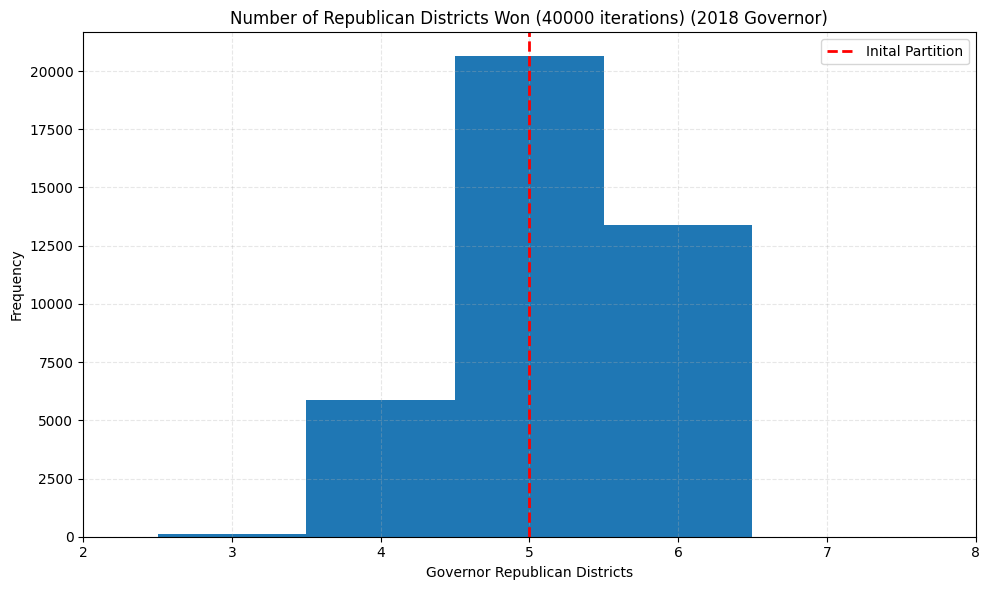

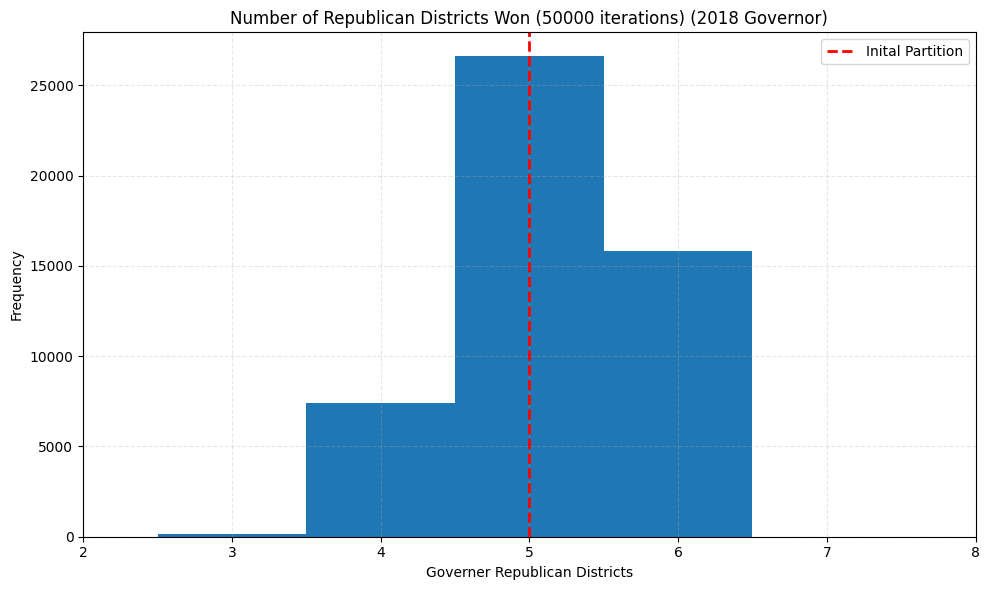

In [117]:
plt.figure(figsize=(10, 6))
bin_edges = np.array([2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
plt.hist(markov_chain_40000["Governor Republican Districts"], bins=bin_edges)
plt.title("Number of Republican Districts Won (40000 iterations) (2018 Governor)")
plt.axvline(x=markov_chain_40000.iloc[0]["Governor Republican Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.xlabel("Governor Republican Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
bin_edges = np.array([2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
plt.hist(markov_chain_50000["Governor Republican Districts"], bins=bin_edges)
plt.axvline(x=markov_chain_50000.iloc[0]["Governor Republican Districts"], color='red', linestyle='--', linewidth=2, label='Inital Partition')
plt.title("Number of Republican Districts Won (50000 iterations) (2018 Governor)")
plt.xlabel("Governer Republican Districts")
plt.ylabel("Frequency")
plt.xticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

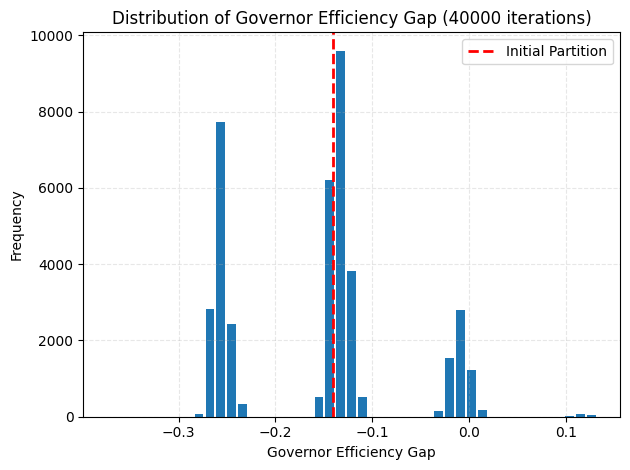

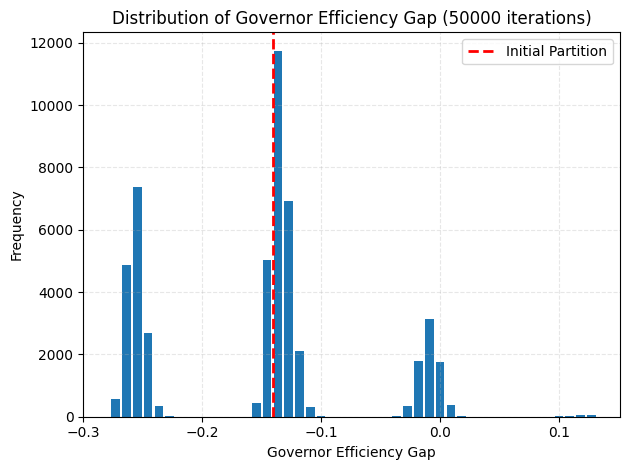

In [123]:
bin_edges = np.arange(-0.35, 0.15, 0.1)
plt.hist(markov_chain_40000["Governor Efficiency Gap"],bins=45, rwidth=0.8)
plt.axvline(x=markov_chain_40000.iloc[0]["Governor Efficiency Gap"], color='red', linestyle='--', linewidth=2, label='Initial Partition')
plt.title("Distribution of Governor Efficiency Gap (40000 iterations)")
plt.xlabel("Governor Efficiency Gap")
plt.ylabel("Frequency")
plt.xticks(np.arange(-0.3, 0.2, 0.1))  # Set x-ticks at the values you want displayed
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')  # Add legend in top right
plt.tight_layout()
plt.show()

bin_edges = np.arange(-0.35, 0.15, 0.1)
plt.hist(markov_chain_50000["Governor Efficiency Gap"],bins=45, rwidth=0.8)
plt.axvline(x=markov_chain_50000.iloc[0]["Governor Efficiency Gap"], color='red', linestyle='--', linewidth=2, label='Initial Partition')
plt.title("Distribution of Governor Efficiency Gap (50000 iterations)")
plt.xlabel("Governor Efficiency Gap")
plt.ylabel("Frequency")
plt.xticks(np.arange(-0.3, 0.2, 0.1))  # Set x-ticks at the values you want displayed
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper right')  # Add legend in top right
plt.tight_layout()
plt.show()